In [18]:
import numpy as np
from skimage import exposure, util
from skimage import io
import matplotlib.pyplot as plt
import os

In [16]:
image_path = "H:/PROJECTS-03/Feyza/240925-NcadGFPxH2Bch-HIGHRES/20240925_151619_20240925_NcadxH2B_05z_timelapse/3d_segmentation_test/pos4-t1-cropped-raw.tif"  # Replace with the actual path
img_raw = imread(image_path)
print(f'Loaded image in an array of shape: {img_raw.shape} and data type {img_raw.dtype}')


Loaded image in an array of shape: (240, 2, 708, 1294) and data type uint16


In [20]:
# Determine kernel sizes in each dim relative to image shape
# Define CLAHE parameters
kernel_size = (img_raw.shape[0] // 20, img_raw.shape[2] // 20, img_raw.shape[3] // 20)  # 3D kernel across time/slices and spatial dimensions
clip_limit = 0.9
kernel_size = np.array(kernel_size)
clip_limit = 0.9

# Split the channels
channel_0 = img_raw[:, 0, :, :]  # Extract the first channel (shape: 240, 708, 1294)
channel_1 = img_raw[:, 1, :, :]  # Extract the second channel (shape: 240, 708, 1294)

# Apply 3D adaptive histogram equalization to each channel
channel_0_clahe = exposure.equalize_adapthist(channel_0, kernel_size=kernel_size, clip_limit=clip_limit)
channel_1_clahe = exposure.equalize_adapthist(channel_1, kernel_size=kernel_size, clip_limit=clip_limit)

# Merge the channels back together
img_clahe = np.stack((channel_0_clahe, channel_1_clahe), axis=1)  # Shape: (240, 2, 708, 1294)


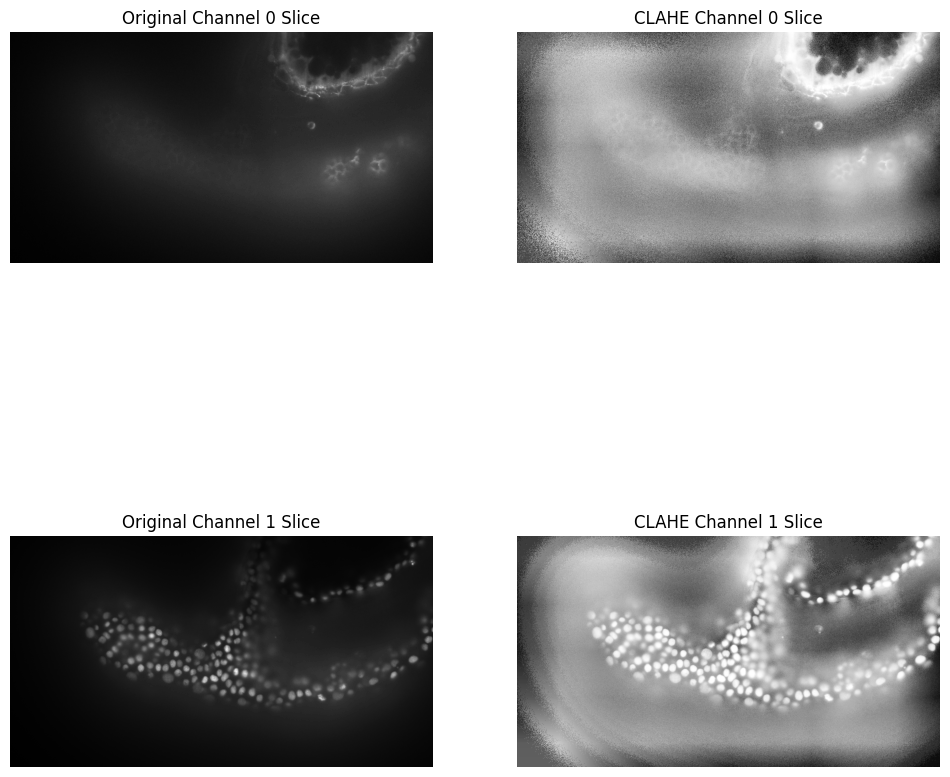

In [21]:
# Display an example slice from each channel before and after CLAHE
slice_index = 50  # Choose a slice index to visualize

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
# Original slices
axes[0, 0].imshow(img_raw[slice_index, 0], cmap='gray')
axes[0, 0].set_title('Original Channel 0 Slice')
axes[0, 0].axis('off')

axes[1, 0].imshow(img_raw[slice_index, 1], cmap='gray')
axes[1, 0].set_title('Original Channel 1 Slice')
axes[1, 0].axis('off')

# CLAHE applied slices
axes[0, 1].imshow(img_clahe[slice_index, 0], cmap='gray')
axes[0, 1].set_title('CLAHE Channel 0 Slice')
axes[0, 1].axis('off')

axes[1, 1].imshow(img_clahe[slice_index, 1], cmap='gray')
axes[1, 1].set_title('CLAHE Channel 1 Slice')
axes[1, 1].axis('off')

plt.show()

In [19]:
# save image to the same directory
base, ext = os.path.splitext(image_path)
output_path = f"{base}_clahe{ext}"
io.imsave(output_path, (img_clahe * 65535).astype(np.uint16))  # Scale to uint16 for saving
